In [1]:
!pip install pytrends

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ------------------------ --------------- 2.4/3.8 MB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 11.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
from pytrends.request import TrendReq #  um die Daten abzurufen

In [3]:
# Verbindung zur google API herstellen
pytrends = TrendReq(hl='de-DE', tz=360)


# Liste, der Keywoerter. Füge maximal 4 weitere hinzu
kw_list = ["NVIDIA"]


pytrends.build_payload(kw_list, 
                        cat=0, 
                        timeframe='today 5-y', 
                        geo='', 
                        gprop=''
                       )



c:\USERS\LARS-\ONEDRIVE\DOKUMENTE\GITHUB\FEM\VENV\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


<Axes: xlabel='date'>

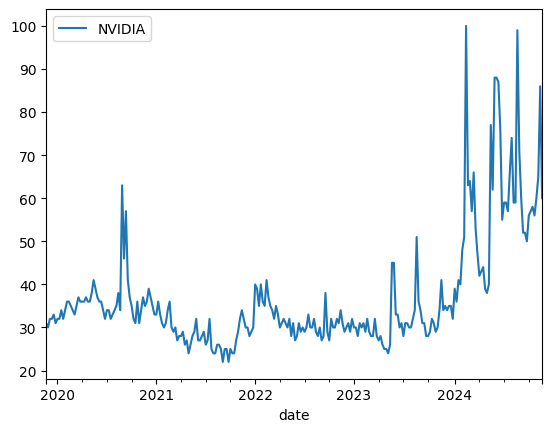

In [14]:
iot = pytrends.interest_over_time()
iot.plot()


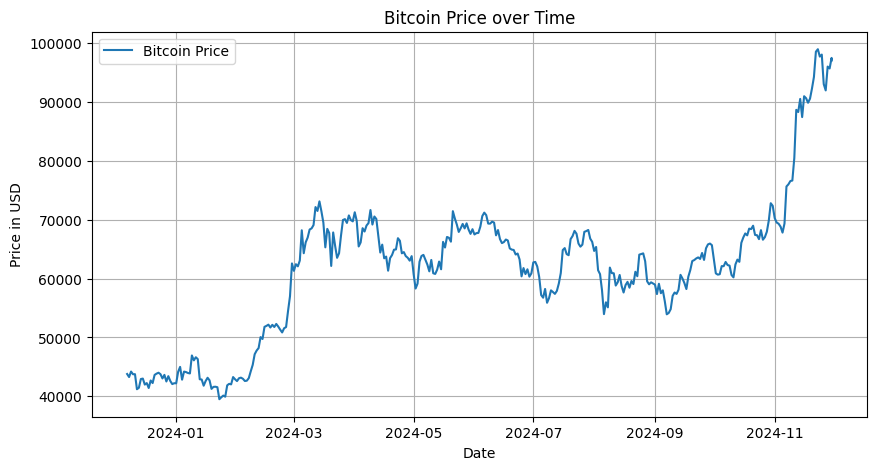

In [22]:
# Daten in ein DataFrame umwandeln
prices = data['prices']
df = pd.DataFrame(prices, columns=['Timestamp', 'Price'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Daten plotten
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['Price'], label='Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price over Time')
plt.legend()
plt.grid(True)
plt.show()

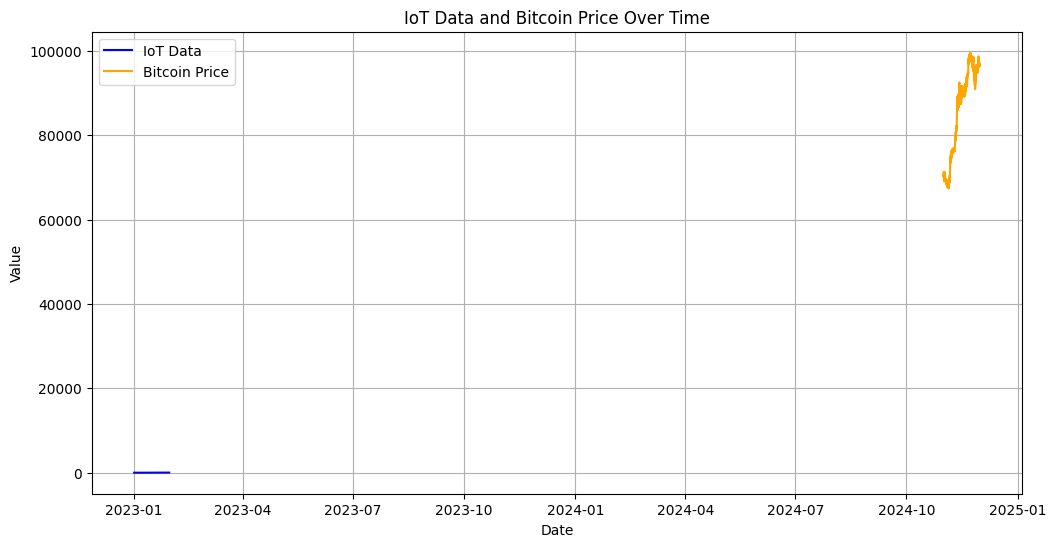

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Beispiel für IoT-Daten
iot_data = {
    'Timestamp': pd.date_range(start='2023-01-01', periods=30, freq='D'),
    'Value': [i + (i % 5) for i in range(30)]
}
iot_df = pd.DataFrame(iot_data)

# Bitcoin-Daten abrufen
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    "vs_currency": "usd",
    "days": "30"
}
response = requests.get(url, params=params)
data = response.json()

# Bitcoin-Daten in DataFrame umwandeln
btc_prices = data['prices']
btc_df = pd.DataFrame(btc_prices, columns=['Timestamp', 'Price'])
btc_df['Timestamp'] = pd.to_datetime(btc_df['Timestamp'], unit='ms')

# Plotten
plt.figure(figsize=(12, 6))

# IoT-Daten plotten
plt.plot(iot_df['Timestamp'], iot_df['Value'], label='IoT Data', color='blue')

# Bitcoin-Daten plotten
plt.plot(btc_df['Timestamp'], btc_df['Price'], label='Bitcoin Price', color='orange')

# Plot-Details
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('IoT Data and Bitcoin Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------------------------------- 948.2/948.2 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=b0aa7e2f09a4464b603de2c1c32f9c48c6c218c658b0b6ddec518cebf516f937
  Stored in directory: c:\users\lars-\appdata\local\pip\cache\wheels\b2\69\9e\5485afcc187c66def1fab96de510fa77da574ec5343f3a5f89
Successfully built peewee



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import yfinance as yf

# Bitcoin-Kurse abrufen
btc_data = yf.download('BTC-USD', start='2018-01-01', end='2023-01-01')
print(btc_data.head())

# Aktienkurse abrufen
stock_data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed


Price          Adj Close         Close          High           Low  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2018-01-01  13657.200195  13657.200195  14112.200195  13154.700195   
2018-01-02  14982.099609  14982.099609  15444.599609  13163.599609   
2018-01-03  15201.000000  15201.000000  15572.799805  14844.500000   
2018-01-04  15599.200195  15599.200195  15739.700195  14522.200195   
2018-01-05  17429.500000  17429.500000  17705.199219  15202.799805   

Price               Open       Volume  
Ticker           BTC-USD      BTC-USD  
Date                                   
2018-01-01  14112.200195  10291200000  
2018-01-02  13625.000000  16846600192  
2018-01-03  14978.200195  16871900160  
2018-01-04  15270.700195  21783199744  
2018-01-05  15477.200195  23840899072  


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2018-01-02  40.524345  43.064999  43.075001  42.314999  42.540001  102223600
2018-01-03  40.517288  43.057499  43.637501  42.990002  43.132500  118071600
2018-01-04  40.705486  43.257500  43.367500  43.020000  43.134998   89738400
2018-01-05  41.168938  43.750000  43.842499  43.262501  43.360001   94640000
2018-01-08  41.016026  43.587502  43.902500  43.482498  43.587502   82271200


In [29]:
import yfinance as yf
import pandas as pd

btc_data = yf.download("BTC-USD", start="2019-01-01", end="2024-10-31")
print(btc_data.columns)
btc_data = btc_data.drop(columns=[
            ('Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')])
# btc_data["Date"] = pd.to_datetime(btc_data["Date"])
print(btc_data)

[*********************100%***********************]  1 of 1 completed

MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
Price          Adj Close
Ticker           BTC-USD
Date                    
2019-01-01   3843.520020
2019-01-02   3943.409424
2019-01-03   3836.741211
2019-01-04   3857.717529
2019-01-05   3845.194580
...                  ...
2024-10-26  67014.695312
2024-10-27  67929.296875
2024-10-28  69907.757812
2024-10-29  72720.492188
2024-10-30  72339.539062

[2130 rows x 1 columns]


In [30]:
btc_data['Data'] = 

KeyError: 'Date'

: 